In [35]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt

# 유저별 KT 정답률

In [36]:
raw_data = pd.read_csv("/opt/ml/input/data/train_data.csv")
user_info = raw_data.pivot_table("answerCode","userID","KnowledgeTag").fillna(0) # 아예 풀지 않은 문제들은 2로 채움
user_info_np = user_info.to_numpy()

In [43]:
model = TSNE(n_components=2) # n_componenets : 결과 data point의 차원
# 대략 5~30초 사이 소요
result = model.fit_transform(user_info_np) #user_info_np

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


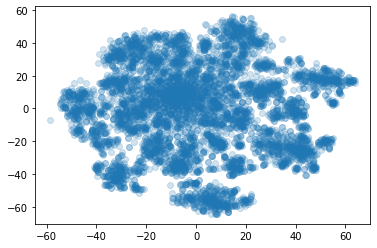

In [44]:
fig, ax = plt.subplots()
ax = plt.scatter(result[:,0],result[:,1], alpha=0.2)
plt.show()

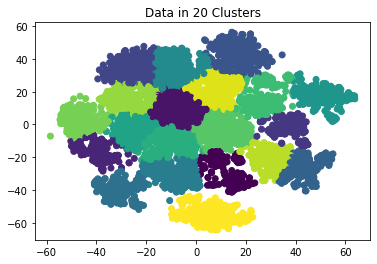

In [49]:
number_of_clusters=20
kmeans = KMeans(n_clusters=number_of_clusters,random_state=42).fit(result)
y_pred=kmeans.predict(result)

plt.scatter(result[:, 0], result[:, 1], c=y_pred)
plt.title("Data in " + str(number_of_clusters) + " Clusters")
plt.show()

In [56]:
label=kmeans.labels_
print(len(result))
print(len(label))
print(label[:10])
print(len(pd.unique(raw_data['userID'])))
kt_cluster_dict=dict()
userID=pd.unique(raw_data['userID']).tolist()
for i in range(len(userID)):
    kt_cluster_dict[userID[i]]=label[i]
kt_cluster_dict

6698
6698
[10  3 19  0 13  7 17 13 10 19]
6698


{0: 10,
 1: 3,
 2: 19,
 5: 0,
 6: 13,
 7: 7,
 8: 17,
 9: 13,
 10: 10,
 11: 19,
 12: 3,
 14: 6,
 15: 8,
 16: 6,
 18: 6,
 19: 19,
 20: 11,
 21: 7,
 22: 8,
 23: 3,
 24: 0,
 25: 0,
 27: 7,
 28: 7,
 30: 3,
 31: 3,
 32: 3,
 33: 7,
 34: 0,
 35: 17,
 36: 10,
 37: 4,
 38: 19,
 39: 0,
 40: 3,
 41: 10,
 42: 7,
 43: 7,
 44: 6,
 46: 6,
 47: 17,
 48: 10,
 49: 10,
 50: 7,
 51: 0,
 52: 17,
 54: 0,
 55: 13,
 56: 6,
 57: 19,
 59: 3,
 60: 10,
 61: 0,
 62: 5,
 63: 6,
 65: 19,
 66: 9,
 67: 6,
 68: 12,
 69: 3,
 70: 19,
 71: 0,
 72: 11,
 73: 17,
 74: 6,
 75: 8,
 77: 10,
 78: 19,
 80: 7,
 81: 6,
 82: 7,
 83: 8,
 84: 13,
 85: 10,
 86: 13,
 87: 7,
 88: 10,
 89: 19,
 90: 19,
 91: 19,
 92: 7,
 93: 0,
 95: 19,
 96: 0,
 97: 19,
 98: 19,
 99: 7,
 100: 19,
 101: 9,
 102: 0,
 103: 19,
 104: 7,
 105: 9,
 106: 8,
 107: 3,
 108: 8,
 109: 8,
 110: 13,
 111: 18,
 112: 10,
 113: 19,
 114: 13,
 115: 7,
 116: 19,
 117: 10,
 118: 10,
 119: 0,
 121: 4,
 122: 3,
 123: 9,
 124: 8,
 125: 6,
 126: 19,
 127: 10,
 128: 11,
 129: 19,


In [61]:
raw_data = pd.read_csv("/opt/ml/input/data/train_data.csv")
def labeling(x):
    return kt_cluster_dict[x]
raw_data['tagCluster']=raw_data['userID'].apply(labeling)
raw_data.head()
raw_data.to_csv('/opt/ml/input/data/FE_total_data_tagCluster.csv')